In [ ]:
import numpy as np
#import tensorflow as tf
import cv2
from tensorflow import keras

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
train,test=fashion_mnist.load_data()
Xtrain, ytrain=train
Xtest, ytest=test
Xtrain=Xtrain/255.
Xtest=Xtest/255.
noise=np.random.normal(0.9,0.1,Xtrain.shape)
Xtrain2=cv2.add(Xtrain,noise)
noise=np.random.normal(0.9,0.1,Xtest.shape)
Xtest2=cv2.add(Xtest,noise)
noise=np.random.normal(0.3,0.1,Xtrain.shape)
Xtrain3=cv2.add(Xtrain,noise)
noise=np.random.normal(0.3,0.1,Xtest.shape)
Xtest3=cv2.add(Xtest,noise)

In [ ]:
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
ytrain2=ytrain.copy()
ytrain2[ytrain<=5]=0
ytrain2[ytrain>5]=1

ytest2=ytest.copy()
ytest2[ytest<=5]=0
ytest2[ytest>5]=1


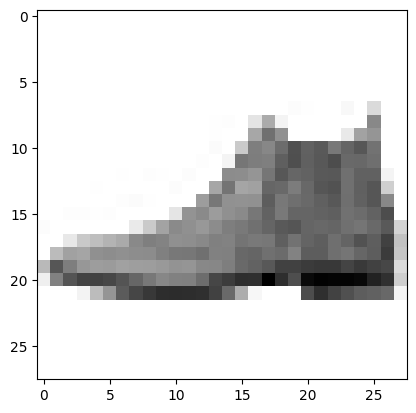

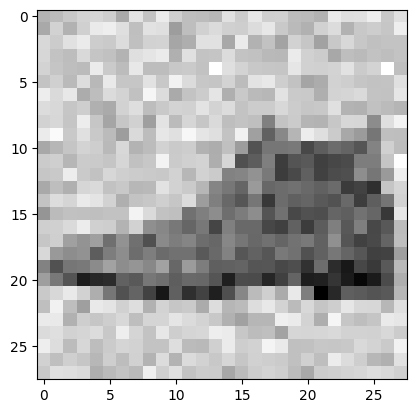

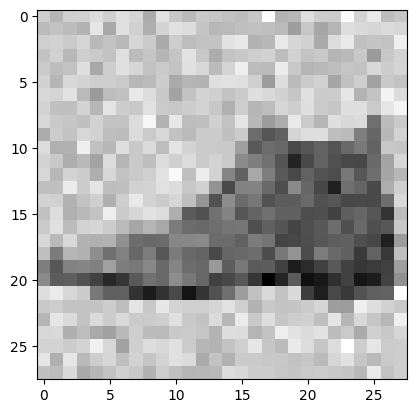

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(Xtest[0,:,:],cmap='binary')
plt.show()
plt.imshow(Xtest2[0,:,:],cmap='binary')
plt.show()
plt.imshow(Xtest3[0,:,:],cmap='binary')
plt.show()

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()
input1=tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]),name='Entrada1')
input2=tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]),name='Entrada2')
input3=tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]),name='Entrada3')
flatten=tf.keras.layers.Flatten(name='Flatten1')(input1)
flatten2=tf.keras.layers.Flatten(name='Flatten2')(input2)
flatten3=tf.keras.layers.Flatten(name='Flatten3')(input3)
h1=tf.keras.layers.Dense(200,activation='tanh',name='H1')(flatten)
h1=tf.keras.layers.Dense(50,activation='tanh',name='H12')(h1)

h2=tf.keras.layers.Dense(200,activation='tanh',name='H2')(flatten2)
h2=tf.keras.layers.Dense(50,activation='tanh',name='H22')(h2)

h3=tf.keras.layers.Dense(200,activation='tanh',name='H3')(flatten3)
h3=tf.keras.layers.Dense(50,activation='tanh',name='H32')(h3)
C=tf.keras.layers.Concatenate()([h1,h2,h3])
Out1=tf.keras.layers.Dense(10,activation='softmax',name='Out1')(C)
Out2=tf.keras.layers.Dense(1,activation='sigmoid',name='Out2')(C)
model_fun=tf.keras.Model(inputs=[input1,input2,input3],outputs=[Out1,Out2])

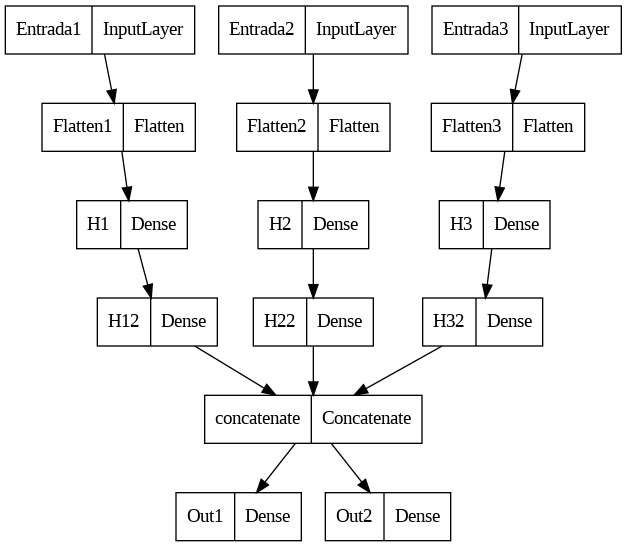

In [ ]:
tf.keras.utils.plot_model(model_fun)

In [ ]:
model_fun.compile(loss=['sparse_categorical_crossentropy','binary_crossentropy'],optimizer='adam',metrics='accuracy')

In [ ]:
histroy=model_fun.fit([Xtrain,Xtrain2,Xtrain3],[ytrain,ytrain2],epochs=5,batch_size=32,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 15s 10ms/step - loss: 0.4443 - Out1_loss: 0.3000 - Out2_loss: 0.1443 - Out1_accuracy: 0.8887 - Out2_accuracy: 0.9397 - val_loss: 0.4963 - val_Out1_loss: 0.3342 - val_Out2_loss: 0.1621 - val_Out1_accuracy: 0.8771 - val_Out2_accuracy: 0.9319
Epoch 2/5
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4220 - Out1_loss: 0.2861 - Out2_loss: 0.1359 - Out1_accuracy: 0.8944 - Out2_accuracy: 0.9441 - val_loss: 0.4540 - val_Out1_loss: 0.3148 - val_Out2_loss: 0.1391 - val_Out1_accuracy: 0.8827 - val_Out2_accuracy: 0.9418
Epoch 3/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4086 - Out1_loss: 0.2768 - Out2_loss: 0.1318 - Out1_accuracy: 0.8977 - Out2_accuracy: 0.9460 - val_loss: 0.4287 - val_Out1_loss: 0.2940 - val_Out2_loss: 0.1347 - val_Out1_accuracy: 0.8921 - val_Out2_accuracy: 0.9439
Epoch 4/5
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3978 - Out1_loss: 0.2694 - Out2_loss

In [ ]:
model_fun.evaluate([Xtest,Xtest2,Xtest3],[ytest,ytest2])

313/313 [==============================] - 1s 4ms/step - loss: 0.5449 - Out1_loss: 0.3642 - Out2_loss: 0.1808 - Out1_accuracy: 0.8664 - Out2_accuracy: 0.9256


[0.5449318289756775,
 0.364155113697052,
 0.18077698349952698,
 0.8664000034332275,
 0.925599992275238]

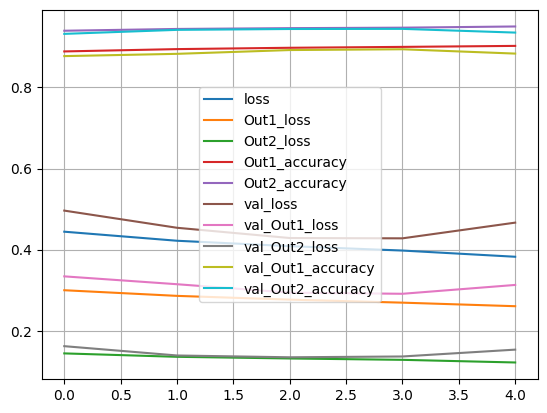

In [ ]:
import pandas as pd
pd.DataFrame(histroy.history).plot()
plt.grid(True)
plt.show()